## Centrality
The intuition about centrality is that it denotes an order of importance on the vertices or edges of a graph by assigning real values to them. Centrality can be interpreted as among other things prestige, influence or control.

Based on the usecases there are different notions of centrality that are useful.

Centerality measures can be broadly classified into:  
1. in-degree centrality  
2. betweenness centrality
3. feedback centrality

## install necessary modules

In [1]:
!pip install networkx


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## example graphs

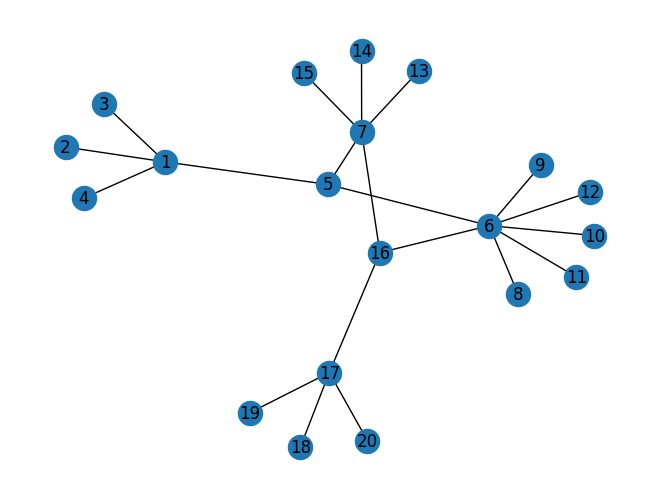

In [3]:
# create eccentricity example graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5),
                  (5, 6), (5, 7),
                  (6, 8),(6,9), (6,10), (6,11), (6,12),(6,16),
                  (7, 13), (7, 14), (7, 15),(7,16),
                  (16,17),
                  (17,18), (17,19), (17,20)
                  ])
# draw the graph
nx.draw(G1, with_labels=True)

                  

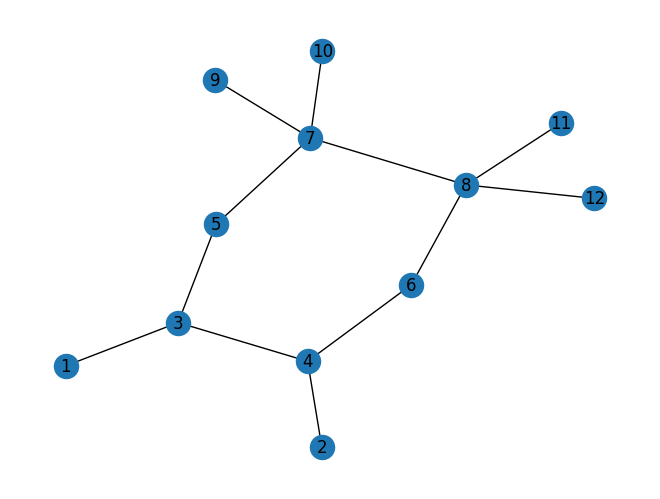

In [4]:
G2 = nx.Graph()
G2.add_edges_from(
    [(1, 3), (2, 4),
     (3,4),
    (3,5), (4, 6),
     (5,7), (6,8),
     (7,8),
     (7,9), (7,10),
     (8,11), (8,12)
     ]
)
nx.draw(G2, with_labels=True)


In [5]:
G3 = nx.Graph()
G3.add_edges_from([
    (1,2), (1,3),(1,4), (1,5),(1,6), (1,7),
    (2,8),(3,8),
    (4,9),(5,9),
    (6,10),(7,10),
    (8,11),(9,11), (10,11),
    (11,12),(11,13)
])

G4 = nx.Graph()
G4.add_edges_from([
    (1,2), (2,3),(3,4), (4,5),(5,6), (5,7),(5,8),    
    (1,9),(9,3),
    (9,10), (10,11), (11,12), (9,12),
    (12,13), (13,5)

])

## Distances and neighbourhood

### Degree based centrality
Degree based centrality comes into picture when there is a concept of voting the node.  
Degree centrality is a local measure as it only depends on the direct neighbourhood of the node.

In [6]:
# degree centrality
# print degree of each vertex as fraction of vertex it is connected to
# print total number of vertices
total_nodes = G1.number_of_nodes()
total_edges = G1.number_of_edges()
print(f"Total number of nodes: {total_nodes}", )
print(f"Total number of edges: {total_edges }" )

# calculate degree centrality
degree_of_nodes = G1.degree()
normalized_degree = [(node_id, round(degree/(total_nodes-1),4)) for node_id, degree in degree_of_nodes]
print(f"normalized_degree: {normalized_degree}")


# calculate degree centrality using direct function
degree_centrality = nx.degree_centrality(G1)
degree_centrality = {k:round(v,4) for k,v in degree_centrality.items()}
print("Degree centrality of each vertex: ", degree_centrality)


Total number of nodes: 20
Total number of edges: 20
normalized_degree: [(1, 0.2105), (2, 0.0526), (3, 0.0526), (4, 0.0526), (5, 0.1579), (6, 0.3684), (7, 0.2632), (8, 0.0526), (9, 0.0526), (10, 0.0526), (11, 0.0526), (12, 0.0526), (16, 0.1579), (13, 0.0526), (14, 0.0526), (15, 0.0526), (17, 0.2105), (18, 0.0526), (19, 0.0526), (20, 0.0526)]
Degree centrality of each vertex:  {1: 0.2105, 2: 0.0526, 3: 0.0526, 4: 0.0526, 5: 0.1579, 6: 0.3684, 7: 0.2632, 8: 0.0526, 9: 0.0526, 10: 0.0526, 11: 0.0526, 12: 0.0526, 16: 0.1579, 13: 0.0526, 14: 0.0526, 15: 0.0526, 17: 0.2105, 18: 0.0526, 19: 0.0526, 20: 0.0526}


### Betweenness centrality
In interpretation of a graph as an influence network a node is considered to be more central when it"s used to transport the opinion of other more than the others. It is also used in a class of problems known as facility location problems.

#### Minimax criterion
Suppose we want to establish a hospital in an area. Ideal location for the same can be found out using minimax criteria i.e what is the maximum time taken by any node(household) in the vicinity to avail hospital service.

Let"s say (u,v) is the shortest distance from u,v. eccentricity of u can be calculates as max(d(u,v)) for all other vertices of G.  
Node with minimum d is the centre of the graph and is usually ideal for setting up an essential facility like a hospital.

In [7]:
# calculate from scratch

# calculate shortest path between all pairs of nodes
shortest_path = dict(nx.all_pairs_shortest_path(G1))
# print(f"Shortest path between all pairs of nodes: {shortest_path}")
all_pair_shortest_path_length = {}
for node, target_dict in shortest_path.items():
    all_pair_shortest_path_length[node] = {k:len(v) -1 for k,v in target_dict.items()}

node_eccentricity = {node:max(target_length_dict.values()) for node, target_length_dict in all_pair_shortest_path_length.items()}
print(f"node_eccentricity: {node_eccentricity}") 
# as observed for node 6 and 7 the farthest node is 3 edges apart which is less than all other nodes


node_eccentricity: {1: 5, 2: 6, 3: 6, 4: 6, 5: 4, 6: 3, 7: 3, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 16: 4, 13: 4, 14: 4, 15: 4, 17: 5, 18: 6, 19: 6, 20: 6}


In [8]:
# calculateusing library function

eccentricity = nx.eccentricity(G1)
print(f"eccentricity: {eccentricity}")

eccentricity: {1: 5, 2: 6, 3: 6, 4: 6, 5: 4, 6: 3, 7: 3, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 16: 4, 13: 4, 14: 4, 15: 4, 17: 5, 18: 6, 19: 6, 20: 6}


#### Minisum criteria
Support you looking to open a shop in town. You want more footfall which we assume is a function of distance of your shop from the rest. In this case you will be minimizing the overall distance of the node from the others, (hence the name minisum)


In [9]:
# calculate from scratch
# calculate length of nodes
no_nodes = G2.number_of_nodes()
# calculate shortest path between all pairs of nodes
shortest_path = dict(nx.all_pairs_shortest_path(G2))
# print(f"Shortest path between all pairs of nodes: {shortest_path}")
all_pair_shortest_path_length = {}
for node, target_dict in shortest_path.items():
    all_pair_shortest_path_length[node] = {k:len(v) -1 for k,v in target_dict.items()}
# print(all_pair_shortest_path_length)
node_minisum = {node:(no_nodes-1)/sum(target_length_dict.values()) for node, target_length_dict in all_pair_shortest_path_length.items()}
print(f"node_minisum: {node_minisum}") 
# as observed for node 7 and 28 are ideal for setting up a shop because they are at minimum overall distance



node_minisum: {1: 0.3055555555555556, 3: 0.4230769230769231, 2: 0.3055555555555556, 4: 0.4230769230769231, 5: 0.4583333333333333, 6: 0.4583333333333333, 7: 0.5, 8: 0.5, 9: 0.34375, 10: 0.34375, 11: 0.34375, 12: 0.34375}


In [10]:
# calculate using function
closeness_centrality = nx.closeness_centrality(G2)
closeness_centrality

{1: 0.3055555555555556,
 3: 0.4230769230769231,
 2: 0.3055555555555556,
 4: 0.4230769230769231,
 5: 0.4583333333333333,
 6: 0.4583333333333333,
 7: 0.5,
 8: 0.5,
 9: 0.34375,
 10: 0.34375,
 11: 0.34375,
 12: 0.34375}

#### Centroid
Let"s explore centrality in a competetive settings. Imagine a salesman is trying to set up a shop  in such a way that it"s more close to other locations than the competitor. To do so you define pairwise advantage  which denotes number of vertices which are closer to u than v.
$$ \gamma_u{(v)} = |{w \in V: d(u,z)>d(v,w)}|$$

If as salesman selects u and competetor selects v then he will have:  

 $$costumers = \gamma_u{(v)} +1/2(n - \gamma_u{(v)} - \gamma_v{(u)})$$

i.e all the costumers closer to him plus half the customers that are equidistant.

Now once the salesman selects a node, competitor can select another node which is more advantageous than the one salesman selected and salesman knows this and hence calculate the worstcase for each vertex.

$$ node\_advantage, f(u,v) = \gamma_u{(v)} - \gamma_v{(u)} $$

$$ c_F = min\{ f(u,v):v\in V-u\}$$


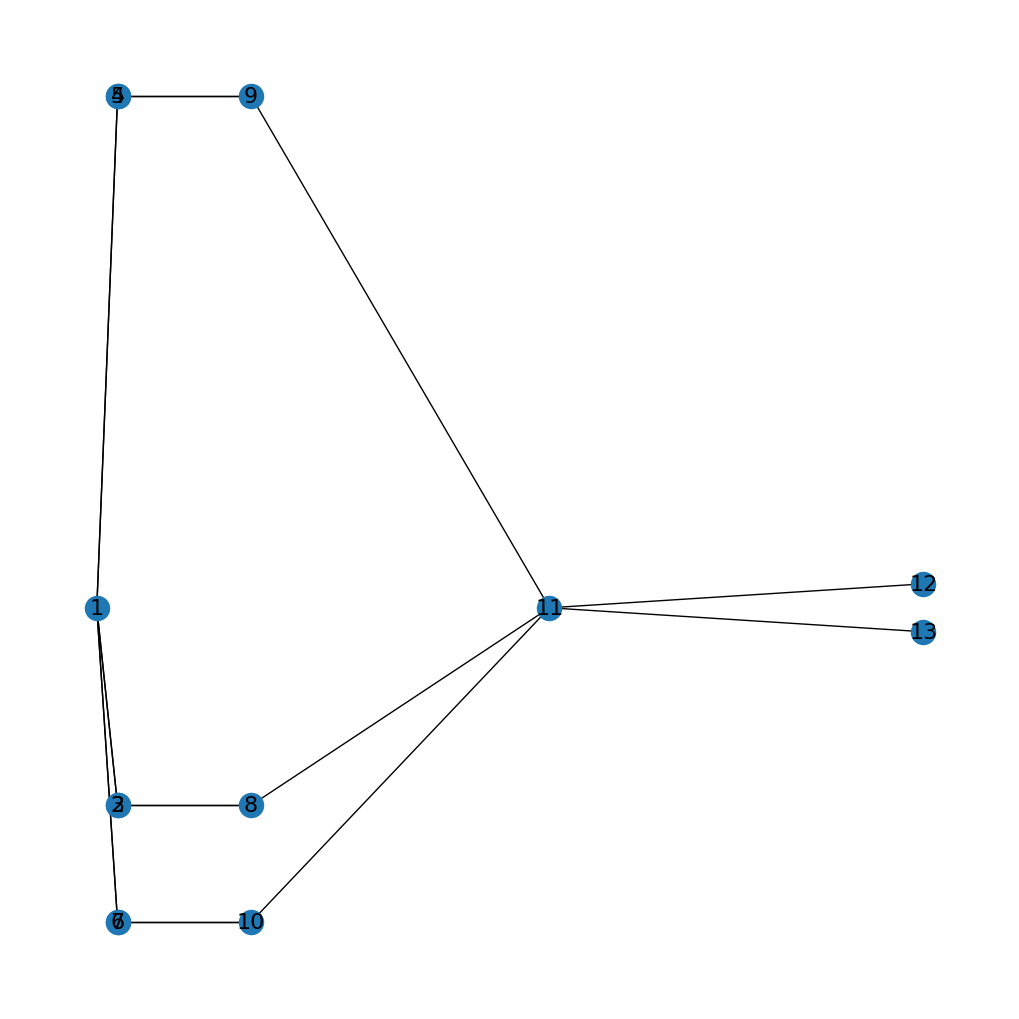

In [11]:
fig = plt.figure(figsize=(10,10))
pos = nx.spectral_layout(G3)
nx.draw(G3, pos=pos, with_labels=True, font_size=16) 

plt.show()

In [12]:
import numpy as np
# calculate shortest path between all pairs of nodes

def get_centroid_values(G):
    total_nodes = int(G.number_of_nodes())
    shortest_path = dict(nx.all_pairs_shortest_path(G))
    # print(f"Shortest path between all pairs of nodes: {shortest_path}")
    all_pair_shortest_path_length = np.zeros((total_nodes+1,total_nodes+1), dtype=int)
    for node, target_dict in shortest_path.items():
        for k,v in target_dict.items():
            # print(f"all_pair_shortest_path_length[{node}][{k}]= {len(v) -1}")
            all_pair_shortest_path_length[node][k] = len(v) -1
    
    all_pair_shortest_path_length.shape
    all_pair_shortest_path_length[1:,1:]
    
    
    # calculate node advantage ie
    node_advantage = np.zeros((total_nodes+1,total_nodes+1), dtype=int)
    for i in range(1,total_nodes+1):
        for j in range(1,total_nodes+1):
            node_advantage[i][j] = - np.sum(all_pair_shortest_path_length[i,:] < all_pair_shortest_path_length[j,:]) + np.sum(all_pair_shortest_path_length[i,:] > all_pair_shortest_path_length[j,:]) 
    # min value of each column
    centroid = np.min(node_advantage, axis=0)
    # print(centroid.shape)
    return {node: advantage for node, advantage in enumerate(centroid[1:],1)}

centroid = get_centroid_values(G3)
print(f"centroid(G3) = {centroid}")

centroid(G3) = {1: 0, 2: -3, 3: -3, 4: -3, 5: -3, 6: -3, 7: -3, 8: -5, 9: -5, 10: -5, 11: -1, 12: -11, 13: -11}


Observe node 1 has maximum value and positive value for centroid and is profitable position for salesman to pick  

nx.draw(G4, with_labels=True)


In [13]:
centroid = get_centroid_values(G4)
print(f"centroid(G4) = {centroid}")

centroid(G4) = {1: -9, 2: -9, 3: -1, 4: -1, 5: -1, 6: -11, 7: -11, 8: -11, 9: -1, 10: -9, 11: -9, 12: -1, 13: -1}


Observe node_advantage is negative for all nodes which means it is not a good idea to pick first. Let the competetor pick one and accorsingly pick your location.

## Random processes

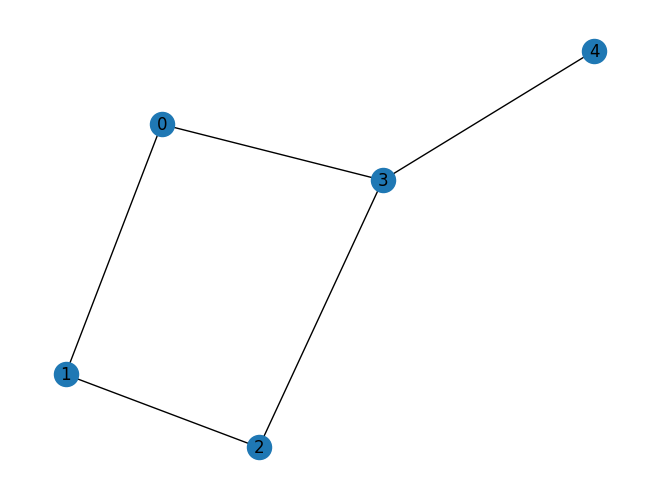

In [14]:
G5 = nx.Graph()
G5.add_edges_from([
    (0,1), (1,2),
    (2,3), (0,3),
    (3,4)
])
nx.draw(G5, with_labels=True)



**Adjacency matrix and it"s interpretation**  
Adjacency matrix, A is a n*n matrix that has cell 

$$ a_{ij} =
  \begin{cases}
    1       & \quad \text{if } n \text{ there is an edge between node i and j}\\
    0  & \quad  \text{otherwise}
  \end{cases}
$$

where n is the number of nodes.

Matrix A also signifies the number of ways in which you can reach from $node_i$ to $node_j$. In $A^r$ each cell $a_{ij}$ will denote the number of r step paths that starts from  $node_i$ and ends with $node_j$. Let"s check with an example

In [15]:
# get adjacency matrix 
adjacency_matrix = nx.adjacency_matrix(G5).todense()
print(f"adjacency_matrix:\n {adjacency_matrix}")


# get adjacency matrix to the power of 2
adjacency_matrix_power_2 = np.linalg.matrix_power(adjacency_matrix, 2)
print(f"adjacency_matrix_power_2:\n {adjacency_matrix_power_2}")

# get adjacency matrix to the power of 3
adjacency_matrix_power_3 = np.linalg.matrix_power(adjacency_matrix, 3)
print(f"adjacency_matrix_power_3:\n {adjacency_matrix_power_3}")

adjacency_matrix:
 [[0 1 0 1 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 0 0 1 0]]
adjacency_matrix_power_2:
 [[2 0 2 0 1]
 [0 2 0 2 0]
 [2 0 2 0 1]
 [0 2 0 3 0]
 [1 0 1 0 1]]
adjacency_matrix_power_3:
 [[0 4 0 5 0]
 [4 0 4 0 2]
 [0 4 0 5 0]
 [5 0 5 0 3]
 [0 2 0 3 0]]


In $A^2$, $a_{33}=3$ signifies there are 5 2-step walks that start and end with node_3
$$ 3->4->3$$ 
$$ 3->0->3 $$
$$ 3->2->3 $$

In $A^3$, $a_{30}=3$ signifies there are 5 3-step walks that start with node_3 and end with node_0:
$$ 3->0->1->0$$ 
$$ 3->2->1->0$$ 
$$ 3->0->3->0$$ 
$$ 3->4->3->0$$ 
$$ 3->0->1->0$$ 


In [16]:
# get degree matrix
degree_matrix = np.diag([G5.degree(node) for node in G5.nodes()])

print(f"degree_matrix:\n {degree_matrix}")






degree_matrix:
 [[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 1]]


In [17]:
nx.current_flow_betweenness_centrality(G5)

ordering: [4, 3, 2, 0, 1]
H: Graph with 5 nodes and 5 edges
id(H): 137810587675536, id(G): 137810552316944
betweenness: {3: 0.0, 4: 0.0, 2: 0.0, 1: 0.0, 0: 0.0}


{0: 0.2916666666666668,
 1: 0.25,
 2: 0.2916666666666666,
 3: 0.6666666666666666,
 4: 0.0}

In [18]:
## Current flow
## Feedback
## Vitality